In [3]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

MODEL_PATH = 'chkpoint/catdogmodel.keras'
IMG_HEIGHT, IMG_WEIGHT = 150, 150
THRESH = 0.5

idx_to_name = {0:'cats', 1:'dogs'}

model = tf.keras.models.load_model(MODEL_PATH)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,184,389 (122.77 MB)

 Trainable params: 10,727,809 (40.92 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 21,455,620 (81.85 MB)

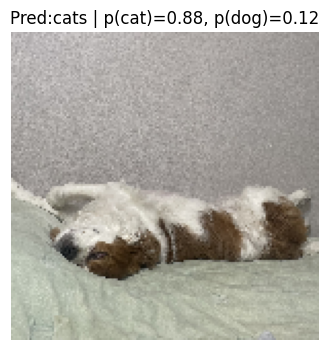

결과는 {'path': 'cat_dog/myimg2.jpg', 'pred': 'cats', 'p_cat': 0.8780024200677872, 'p_dog': 0.12199757993221283}


In [12]:
# 전처리
def preprocess_img(img_path):
    # 단일 이미지 경로를 받아 (1, 150, 150, 3) tensor로 변환
    img = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WEIGHT))
    arr = tf.keras.utils.img_to_array(img)   # (H, W, C) float32
    arr = arr / 255.0    # 스케일링
    arr = np.expand_dims(arr, axis=0)   # 차원 추가 -> (1, H, W, C)
    return arr

def predict_one(img_path, show=True):
    # 이미지 하나를 분류 예측하고 출력 후. 반환
    x = preprocess_img(img_path)   # 전처리
    prob_dog = float(model.predict(x, verbose=0)[0][0])   # dog 확률 값
    pred_idx = int(prob_dog >= THRESH)
    pred_name = idx_to_name[pred_idx]
    prob_cat = 1.0 - prob_dog
    
    # 단일 이미지 시각화
    if show:
        img_disp = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WEIGHT))
        plt.figure(figsize=(4,4))
        plt.imshow(img_disp)
        plt.axis('off')
        plt.title(f"Pred:{pred_name} | p(cat)={prob_cat:.2f}, p(dog)={prob_dog:.2f}")
        plt.show()
    return {'path':img_path, 'pred':pred_name, 'p_cat':prob_cat, 'p_dog':prob_dog}

result = predict_one('cat_dog/myimg2.jpg', show=True)
print(f"결과는 {result}")